# Linear Regression

In [47]:
# Loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
data = pd.read_csv('Student_Performance.csv')
print("Shape of the dataset is ", data.shape)
data.head()

Shape of the dataset is  (10000, 6)


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [49]:
data.isnull().sum()
# As there are any nulls in the data present
# We can see taht there are no nulls present in the data 

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [50]:
# maping Yes and No from Extracurricular Activities
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({"Yes":1,"No":0})
data['Extracurricular Activities'].head()

0    1
1    0
2    1
3    1
4    0
Name: Extracurricular Activities, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
X = data.drop("Performance Index", axis=1)
Y = data['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [52]:
from sklearn.linear_model import LinearRegression

le = LinearRegression()
le.fit(X_train, y_train)
y_pred = le.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error is ", mse)
r2 = r2_score(y_test, y_pred)
print("R2 Score is ", r2)

Mean Squared Error is  4.0964404694585
R2 Score is  0.9892386793406651


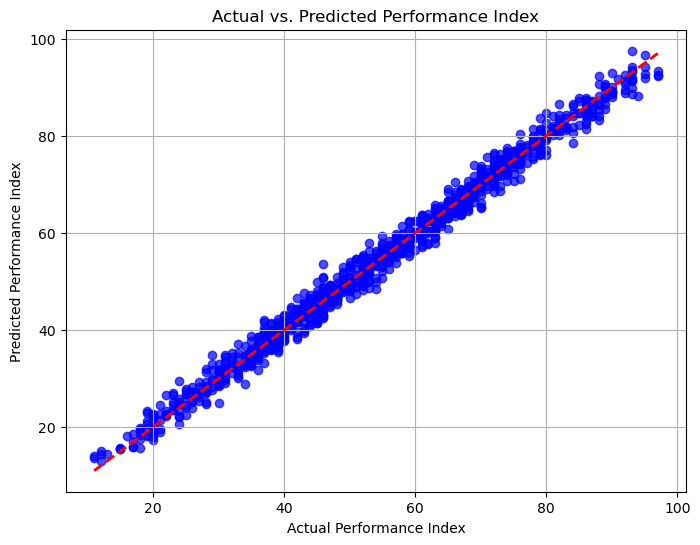

In [54]:
# import seaborn as sns
# sns.scatterplot(y_test)

# Create a plot of actual vs. predicted values for the test set to visually assess the model’s performance.
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs. Predicted Performance Index')
plt.grid(True)
plt.show()
